# Lecture 7 - Machine Learning (1) - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

## Logistic Regression

* Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist (https://en.wikipedia.org/wiki/Logistic_function).
* In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression). 
* Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".
* You can also check out further materials to learn.
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* Let's make a logistic regression model with the simple data.

In [3]:
df_genders = pd.read_csv('./genders.csv')
df_genders.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


* How many "Male" and "Female" samples?

In [5]:
df_genders['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

* How about the distributions and correlations of each variable?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


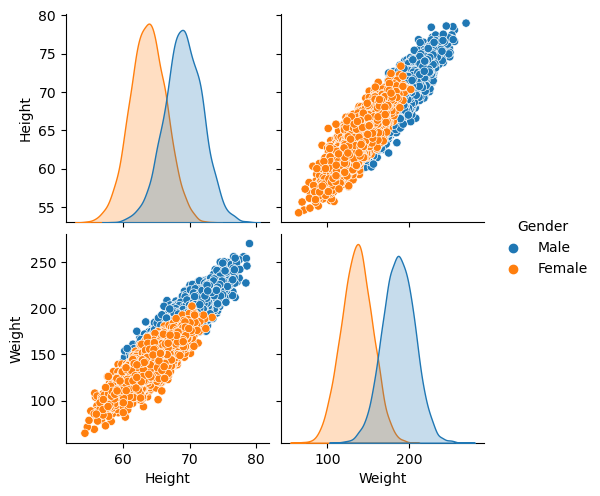

In [7]:
sns.pairplot(data=df_genders, hue='Gender')
plt.show()

* For using the logistic regression, let's transform the "Gender" column values as binary.

In [9]:
gender_binary = {"Male": 0, "Female": 1}
df_genders['Female'] = df_genders['Gender'].map(gender_binary)

In [11]:
df_genders.head()

,Gender,Height,Weight,Female
0,Male,73.847017,241.893563,0
1,Male,68.781904,162.310473,0
2,Male,74.110105,212.740856,0
3,Male,71.730978,220.042470,0
4,Male,69.881796,206.349801,0


* Let's split the data with features and target.

In [13]:
x = df_genders[['Height', 'Weight']]
y = df_genders['Female']

* Applying the logistic regression with scikit-learn is quite straightforward.

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

* You can measure the accuracy using `accuracy_score`.

In [19]:
predict = logreg.predict(x_test)

In [23]:
predict

array([1, 0, 0, ..., 0, 1, 1])

In [25]:
y_test

9953    1
3850    0
4962    0
3886    0
5437    1
       ..
6955    1
557     0
2455    0
3920    0
6405    1
Name: Female, Length: 2500, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.914

* Let's take an one more example. The problem is to predict the onset of diabetes based on diagnostic measures using "Pima Indians Diabetes Database" (https://www.kaggle.com/uciml/pima-indians-diabetes-database ).

In [27]:
diabetes = pd.read_csv('./diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Explore the data.

* Let's split the data.

In [29]:
x = diabetes.drop(['Outcome'], axis = 1)
y = diabetes['Outcome']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

* Model Development and Prediction

In [33]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predict = logreg.predict(x_test)

* Measure the accuracy.

In [37]:
accuracy_score(y_test,predict)

0.7760416666666666

* Model evaluation using confusion matrix
* Confusion matrix is a table that is used to evaluate the performance of a classification model (https://www.geeksforgeeks.org/confusion-matrix-machine-learning).

In [39]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predict)

In [41]:
cnf_matrix

array([[109,  14],
       [ 29,  40]])

* From the confusion matrix, you can evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [43]:
print("Accuracy:", metrics.accuracy_score(y_test, predict))
print("Precision:", metrics.precision_score(y_test, predict))
print("Recall:", metrics.recall_score(y_test, predict))

Accuracy: 0.7760416666666666
Precision: 0.7407407407407407
Recall: 0.5797101449275363


In [45]:
40/69

0.5797101449275363

In [47]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)

In [49]:
f1

0.6504065040650405

* ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

0.8467067279368446


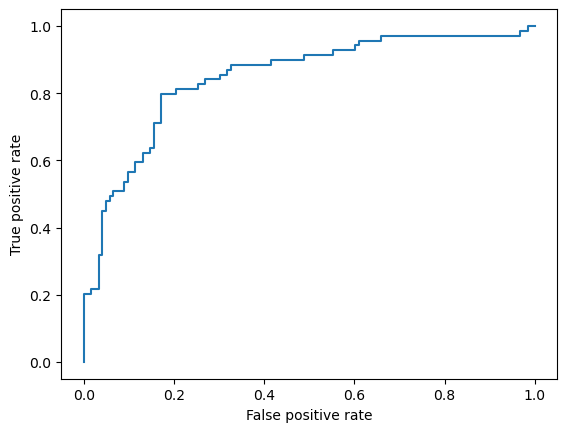

In [51]:
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

predic_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predic_prob)
auc = metrics.roc_auc_score(y_test, predic_prob)
plt.plot(fpr,tpr)
print(auc)
plt.show()